# ニューラルネットワークの復習

## 数学とPythonの復習

1. ベクトル

    $
    \begin{pmatrix}
        1 \\
        2 \\
        3
    \end{pmatrix}
    $

2. 行列

    $
    \begin{pmatrix}
        1 & 2\\
        3 & 4\\
        5 & 6
    \end{pmatrix}
    $

    * 行(row)：横方向の並び
    * 列(column)：縦方向の並び

3. テンソル：行列の拡張．$N$次元の数の集まり

* ベクトルの表し方
    * 列ベクトル

    $
    \begin{pmatrix}
        1\\
        2\\
        3
    \end{pmatrix}
    $

    * 行ベクトル

    $
    \begin{pmatrix}
        1 & 2 & 3
    \end{pmatrix}
    $

### ベクトルや行列の生成
* ベクトルや行列は np.array メソッドで生成する.このメソッドにより np.ndarrayクラスが生成される．

In [6]:
import numpy as np

In [14]:
# 1次元の配列を生成
x = np.array([1,2,3])
x.__class__

numpy.ndarray

In [15]:
# 配列の形状．1行3列．1は表示されない
# (1,3)と表示するのが自然な気がするが，なぜか (3,) と表示される
x.shape

(3,)

In [16]:
# 次元数
x.ndim

1

In [11]:
W = np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [13]:
W.ndim

2

### 行列の要素ごとの(element-wise)演算

In [18]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + x

array([[2, 4, 6],
       [5, 7, 9]])

In [19]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### ブロードキャスト
形状の異なる配列同士の計算

In [20]:
# ブロードキャストの例．Aと掛け算するために10という値は [[10,10],[10,10]] に拡張される．
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [22]:
# ブロードキャストの例2．[10,20]という1次元配列は [[10,20],[10,20]] に拡張される．
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

### ベクトルの内積と行列の積

* ベクトルの内積：2つのベクトル間の対応する要素の積の和
    * 直感的には**「2つのベクトルがどれだけ同じ方向を向いているか」**を表す

    $
    \bf{x}\cdot\bf{y} = x_1 y_1 + x_2 y_2 + ... + x_n y_n
    $

* 行列の積

    $
    \begin{equation}
        \begin{pmatrix}
            1 & 2\\
            3 & 4
        \end{pmatrix}
        \begin{pmatrix}
            5 & 6\\
            7 & 8
        \end{pmatrix}
        =
        \begin{pmatrix}
            a \cdot c & a \cdot d\\
            b \cdot c & b \cdot d
        \end{pmatrix}
        =
        \begin{pmatrix}
            19 & 22\\
            43 & 50
        \end{pmatrix}
    \end{equation}
    $

    ただしここで

        a = (1,2), b=(3,4), c=(5,7), d=(6,8)

    とする

In [24]:
# ベクトルの内積
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [25]:
# 行列の積
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

### 行列の形状チェック
対応する次元の要素数を一致させることが必要

$(3,2) \times (2,4) = (3,4)$

## ニューラルネットワークの推論
* ニューラルネットワークの処理は2つのフェーズからなる
    * 学習
    * 推論

### ニューラルネットワークの推論の全体図
* ニューラルネットワークは単なる関数．何かを入力したら何かが出力される変換器である
    * たとえば2次元のデータを入力して，3次元のデータを出力する，など
* ニューラルネットワークの表現例（入力2次元，出力3次元，4つのニューロンの隠れ層）
    <img src="images/chap1_1.png" />

ニューラルネットワークが行う計算を数式で表してみる．

* ニューロンは重み付き和で計算される．
    * 隠れ層も同様
* 入力データ$(x_1, x_2)$, 重み $w_{11}, w_{21}$, バイアス b_1 のとき，隠れ層の第1要素のニューロンの値は次式で表される.
    * バイアスとは前層のニューロンに影響を受けずに加算される定数のこと
    * 重みのインデックスを後の実装を考慮している（前層の要素番号が後にくる）

    $
    h_1 = x_1 w_{11} + x_2 w_{12} + b_1
    $

    <img src="images/chap1_2.png" />
* 隠れ層全体では次のような形でまとめて表現できる(右上のカッコ囲み数値は1層目であることを示す)
    
    $
    \begin{equation}
        (h_1^{(1)}, h_2^{(1)}, h_3^{(1)}, h_4^{(1)}) = (x_1, x_2)
        \begin{pmatrix}
            w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} & w_{41}^{(1)}\\
            w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} & w_{42}^{(1)}
        \end{pmatrix}
        + (b_1^{(1)}, b_2^{(1)}, b_3^{(1)}, b_4^{(1)})
    \end{equation}
    $

* 簡略化して次のように表現できる(入力$\bf{x}$, 重み$\bf{W}$, バイアス$\bf{b}$, 隠れ層$\bf{h}$)
    
    $
    \bf{h} = \bf{xW} + \bf{b}
    $

* 以上の式は1データに対する式であるため，複数のデータをまとめて計算する（いわゆるバッチ計算の）場合は入力の行数が増える．それに伴い隠れ層の行数も増えることになる
    
    $ h_{(N,4)} = x_{(N,2)}W_{(2,4)} + b_{(N,4)}  $
    
    (実際の計算ではバイアスは(1,4)の形状で用意し，ブロードキャストで(N,4)にする)

In [151]:
# バッチの場合の変換計算
import numpy as np

# ランダムに値を生成させることによって指定した形状の初期データを作る．

# 入力：10個の2次元データ
x = np.random.randn(10,2)
# 重み
W1 = np.random.randn(2,4)
# バイアス
b1 = np.random.randn(4)
# 隠れ層．バイアスの形状は(1,4)だが(10,4)にブロードキャストされる
h = np.dot(x, W1) + b1

print("x = ")
print(x)
print("W1 = ")
print(W1)
print("b1 = ")
print(b1)
print("h = xW + b = ")
print(h)

x = 
[[ 0.89799343 -1.07750961]
 [-0.86822284 -0.61854404]
 [-1.51279174 -0.64518956]
 [ 0.86648952  2.49055111]
 [-0.44562529  1.52499317]
 [-0.80636703  1.13508976]
 [-0.55309589 -0.19011395]
 [ 0.70045533  1.24123812]
 [ 0.34626131  0.25980428]
 [ 0.90672643 -1.65722437]]
W1 = 
[[ 1.09806343 -0.44078984  1.15891428 -0.0878548 ]
 [-0.21520362 -0.24156197 -0.12395511  0.43500539]]
b1 = 
[ 0.66706794 -0.3421852   0.79389976  0.59031989]
h = xW + b = 
[[ 1.88500566 -0.47772623  1.96816     0.04270437]
 [-0.15318289  0.18993532 -0.13562439  0.39752745]
 [-0.85522621  0.48049129 -0.87932164  0.44256497]
 [ 1.08255277 -1.32574739  1.4893703   1.59759777]
 [-0.15044095 -0.51413845  0.08842755  1.29285046]
 [-0.46264963 -0.26094132 -0.28131069  1.15493327]
 [ 0.10064678 -0.05246185  0.17647463  0.55621143]
 [ 1.16909339 -0.95077471  1.45180964  1.06872679]
 [ 0.991374   -0.5575725   1.16298287  0.67291543]
 [ 2.01935176 -0.34153861  2.0501394  -0.2102419 ]]


#### 活性化関数(activation function)

* 活性化関数とは
    * 入力信号の総和を出力信号に変換する関数
    * 入力信号の総和がどのように発火するかを決定するための関数


* 全結合層による「線形」な変換に「非線形」な効果を与える


* 様々な種類がある
    * ステップ関数
        * パーセプトロンで用いられた．ニューラルネットワークでは使われない．
    * シグモイド関数(sigmoid function)

    $
    \begin{equation}
    \sigma(x) = \frac{1}{1 + \exp(-x)}
    \end{equation}
    $

    * ReLU(Rectified Linear Unit)
        * 活性化関数の一つ．以前はシグモイド関数が主だったが，最近よく使われている．
        * 入力が0を超えていれば入力をそのまま出力し，0以下ならば0を出力する
    * 双曲線関数(tanh関数)

** ステップ関数とシグモイド関数の比較 **
* 滑らかさが違う．この滑らかさが学習において意味をもつ
* ステップ関数は0か1の値しか返さないが，シグモイド関数はその間の数値も返す
* 両者とも入力が小さい時は0に誓う，大きくなるに従い1に近づく
* 単調増加である
* どのような値の範囲をとっても出力が0から1の間の値になる
* 両者とも非線形関数
    * 線形だと多層にする利点を生かすことができないため線形は不適
    * 線形だと何回変換しても隠れ層のないネットワークが作れてしまう
        * アフィン変換

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

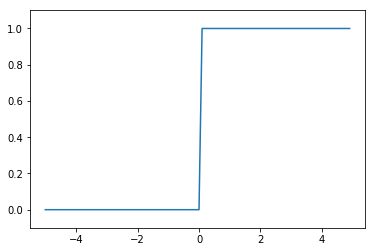

In [154]:
# ステップ関数(x: numpy配列(1xN))
def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x,y)

plt.ylim(-0.1, 1.1)
plt.show()

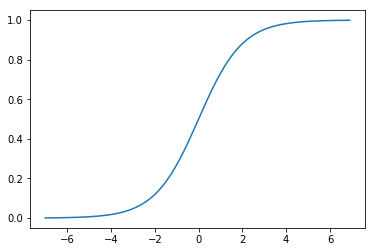

In [155]:
# シグモイド関数(x: numpy配列(1xN))
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

x = np.arange(-7, 7, 0.1)
y = sigmoid(x)
plt.plot(x,y)

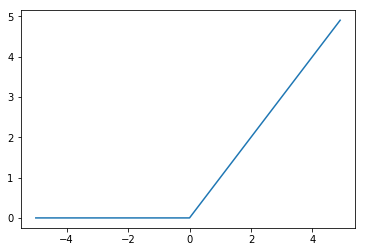

In [156]:
# ReLU関数(x: ndarray (1xN))
def relu_function(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y = relu_function(x)
plt.plot(x, y)
plt.show()

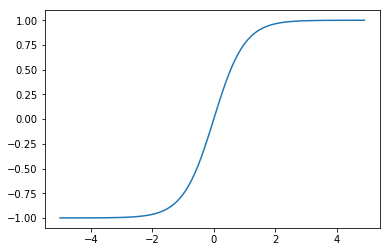

In [3]:
import numpy as np

# tanh関数(x: ndarray (1xN))
def tanh(x):
    return np.tanh(x)

x = np.arange(-5, 5, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.show()

** 入力から出力までを一つにまとめてみる **
<img src="images/chap1_3.png" />

In [161]:
# 入力から出力までをまとめてみる
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h1 = np.dot(x, W1) + b1
a1 = sigmoid(h1)
s = np.dot(a1, W2) + b2

print("W1 =")
print(W1)

print("b1 =")
print(b1)

print("W2 =")
print(W2)

print("b2 =")
print(b2)

print("x =", x)
print("h1 =")
print(h1)
print("a1 =")
print(a1)
print("s =", y)


W1 =
[[-0.42100039 -1.83637674 -1.88719614 -0.02327671]
 [-0.56862859  2.20103688  0.94698541 -1.62401008]]
b1 =
[ 0.42276279 -0.80764748  0.99661846 -1.16044912]
W2 =
[[-0.9845518   0.27013178 -1.13388644]
 [-0.55849986  0.97666447  0.11729902]
 [ 1.24347035 -0.87349529 -1.33635271]
 [ 2.2419775  -0.54877585  1.90273356]]
b2 =
[-0.29197901 -0.75286932  0.59263247]
x = [[ 0.92685767  0.36080894]
 [ 0.0962304  -0.56552267]
 [-0.51106047 -0.74264461]
 [-1.85129322  0.86021383]
 [-0.26032041 -0.17451359]
 [ 0.36571645  2.39960893]
 [ 0.93104823  1.15669177]
 [-0.82893899 -0.46203852]
 [-1.59976242 -1.24165053]
 [ 0.96353511 -0.11943888]]
h1 =
[[-0.17261093 -1.71555355 -0.41086294 -1.76798067]
 [ 0.70382211 -2.22909901  0.2794711  -0.24427452]
 [ 1.06020841 -1.5037361   1.25781621  0.05750903]
 [ 0.71301578  4.48538669  5.30498183 -2.51435304]
 [ 0.6315912  -0.71371197  1.32263232 -0.87097789]
 [-1.09569022  3.80238711  2.57883445 -5.06595089]
 [-0.62693689  0.02851847  0.33491808 -3.06059

#### 出力関数
* 出力層の活性化関数$σ()$は隠れ層の活性化関数$h()$とは区別し，別の記号を用いる
* 出力層で使用する活性化関数は解く問題の性質に応じて決める
    * 回帰：恒等関数
    * 分類
        * 2クラス分類問題：シグモイド関数
        * 多クラス分類：ソフトマックス関数
            * ソフトマックス関数の出力は全ての入力信号からの影響を受ける
            * n=2 で分母分子を akで割るとシグモイド関数の形になる

        $
        y = \frac{\exp(a_k)}{\sum_{i=1}^{n}{\exp(a_i)}}
        $

        (n: 出力層のノード個数，k: 計算対象のノード番号)

** ソフトマックス関数の特徴 **
* 関数の出力は0から1.0の間の実数である
* 関数の出力の総和は1になる
    * ソフトマックス関数の出力を確率として解釈することができる
        * とはいえ，確率密度関数としての要件は満たすかもしれないが，それが確率分布をよく表現しているとどうして言えるのか？
    * 確率として解釈できるということはもっとも大きな値を持つニューロンがもっとも高い確率であるとして解釈できるということ
* 単調増加
    * 分類だけを目的とする場合は，関数の大小関係が入出力で変化しないのでソフトマックス関数の計算を省略することもある
    * ソフトマックス関数を用いる意味は学習時にある


In [160]:
# ソフトマックス関数の実装（オーバーフロー対策済み）
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### レイヤとしてのクラス化と順伝播の実装
* ニューラルネットワークの処理を「レイヤ（layer, 層）」として実装する
* 全結合層をAffineレイヤ，シグモイド関数による変換をSigmoidレイヤとする
* レイヤはPythonのクラスとして実装する
* レイヤクラスのルール
    * 順伝播処理の forward() メソッドをもつ
    * 逆伝播処理の backward() メソッドをもつ
    * 重みやバイアスなどのパラメータをリストとして保持する params 変数をもつ
    * 各パラメータの勾配をリストとして保持する grads 変数をもつ

In [8]:
# シグモイド層

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [6]:
# アフィン層

class Affine:
    # 初期化処理
    # W: 重みパラメータの初期値(ndarray)
    # b: バイアスの初期値(ndarray)
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out        

In [4]:
# レイヤを利用してネットワークを実装

class TwoLayerNet:
    # input_size: 入力ニューロンの数(スカラ値)
    # hidden_size: 隠れ層のニューロン数(スカラ値)
    # output_size: 出力ニューロンの数(スカラ値)
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 全レイヤのパラメータをまとめる
        # パラメータが全て格納されているため，パラメータ更新や保存が容易になる
        # レイヤの構造や各レイヤのパラメータを知っておく必要がある
        self.params = []
        for layer in self.layers:
            # パラメータリストの連結
            self.params += layer.params

    # 推論処理(x: 入力データ(サイズ：input_size)
    def predict(self, x):
        # このメソッド内で x はレイヤを通過するごとにサイズが変わる
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [9]:
# ネットワークを利用して推論してみる
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print("x =", x)
print("s =")
print(s)

x = [[-1.12129049 -0.04280328]
 [-1.8671919  -0.32672249]
 [-0.33109808  1.02922014]
 [ 1.6842468   0.95336009]
 [ 0.02785868  1.39099791]
 [-0.46721078 -0.77321074]
 [-0.51497242 -0.15632826]
 [-0.31002032  0.06990951]
 [ 0.08294128  0.57244028]
 [ 0.89236749 -0.18682021]]
s =
[[-2.35685723  1.1140355   0.73638562]
 [-2.94431425  1.50164106  0.86882232]
 [-1.29157991  0.34893917  0.62504206]
 [-0.59875919 -0.08841404  0.38691982]
 [-0.97176054  0.10865127  0.60047608]
 [-1.92595377  0.9333191   0.43581102]
 [-1.80751143  0.80667817  0.50096776]
 [-1.55046616  0.6286274   0.46108595]
 [-1.11833976  0.30199718  0.44827217]
 [-0.91899826  0.2711553   0.18918423]]


## ニューラルネットワークの学習
* 学習とは最適なパラメータを見つける作業
    * データから最適なパラメータの値を自動で獲得すること
* パラメータを学習により洗練する
    * 学習の目的は「損失関数」を指標として導入し，その値が最小となる重みパラメータを探し出すこと
* 学習の手法として，勾配法とよばれる，関数の傾きを使った手法を使う

### 損失関数
* **損失**：学習がどれだけうまくいっているかを知るための指標．「どれだけ予測結果が悪いか」を示す数値として表される
* **損失関数** : 損失を求めるための処理．正解と予測結果をもとに，予測結果がどれだけ悪いかを数値として出力する

* 損失関数の種類
    * 2乗和誤差(mean squared error)

    $
    E = \frac{1}{2}\sum_{k}(y_k - t_k)^2
    $
    
        * 記号の意味：
            * $y_k$ : ニューラルネットワークの出力
            * $t_k$ : 教師データ
            * $k$ : データの次元数

    * 交差エントロピー誤差(Cross Entropy Error)

    $
    E = -\sum_k t_k \log y_k
    $
    
        * 記号の意味：
            * $\log$ は底が $e$ の自然対数 $\log_e$
            * $y_k$: ニューラルネットワークの出力
            * $t_k$: 正解ラベル
        * one-hot表現の場合，正解ラベルの自然対数の計算を行うだけになる（簡単）

* バッチ処理を考慮した交差エントロピー誤差は次のようになる(n: データ数)

    $
    E = -\frac{1}{N}\sum_n\sum_k t_{nk} \log y_{nk}
    $



In [184]:
import numpy as np

# 2乗和誤差の実装
# y, t: Numpyの配列
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# yはニューラルネットワークの出力を表す
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# t1, t2:教師データ(one-hot表現)
t1 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # 2 が正解のケース
t2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]    # 7 が正解のケース

# 誤差の計算．結果y は正解がt1の時は誤差が小さく，正解がt2のケースでは誤差が大きい
print("error(t1) = ", mean_squared_error(np.array(y), np.array(t1)))
print("error(t2) = ", mean_squared_error(np.array(y), np.array(t2)))

error(t1) =  0.09750000000000003
error(t2) =  0.5975


In [10]:
import numpy as np

# 交差エントロピー誤算の実装
# t: 教師データ．one-hot(データ数,分類クラス数)およびラベル(データ数,1)のいずれか．
# y: 計算結果(データ数, 分類クラス数)．
def cross_entropy_error(y, t):
    # データ数が1個の場合はy,t共にベクトルなので，2次元配列化しておく
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # log関数の入力が0にならないようにするための対策
    delta = 1e-7

    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    # one-hotかどうかは教師データ(t)および計算結果(y)の配列要素数が等しいかどうかで判断
    # 正解ラベルのインデックスは，[0,0,1,0,0]の場合は 2 となる
    # 行ごとに最大値(=1)をとるインデックスを求める(axis=1)
    # t の形状は (データ数,) となる
    if t.size == y.size:
        t = t.argmax(axis=1)
        print("t(argmax).shape =", t.shape)

    # バッチサイズ(一度に計算するデータの数, スカラ値)
    batch_size = y.shape[0]
    print("batch_size =", batch_size)

    # 交差エントロピーの計算
    # y[np.arange(batch_size), t] の形状は (データ数,) となる
    print("y[np.arange(batch_size), t].shape =", y[np.arange(batch_size), t].shape)
    print("y[np.arange(batch_size), t] =", y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [11]:
# 交差エントロピーを計算してみる

# y: ニューラルネットワークの出力
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# t1, t2:教師データ(one-hot表現)
t1 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # 2 が正解のケース
t2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]    # 7 が正解のケース


# 誤差の計算．結果y は正解がt1の時は誤差が小さく，正解がt2のケースでは誤差が大きい
print("calulate a cross-entropy error with one-hot:")
print()
print("error(t1) = ", cross_entropy_error(np.array(y), np.array(t1)))
print()
print("error(t2) = ", cross_entropy_error(np.array(y), np.array(t2)))
print()

# one-hotの代わりにラベルで与えてみる
print("calulate a cross-entropy error with label:")
print()
print("error(t1) = ", cross_entropy_error(np.array(y), np.array([2])))
print()
print("error(t2) = ", cross_entropy_error(np.array(y), np.array([7])))
print()

# バッチサイズ2の場合を試してみる
print("calulate a cross-entropy error (batch_size=2):")
print()

t3 = np.array([t1, t2])
print("t3 = [t1 t2] =")
print(t3)
y2 = [y, y]
print("y2 = [y y] =")
print(y2)
print()
print("error(t3) = ", cross_entropy_error(np.array(y2), np.array(t3)))

calulate a cross-entropy error with one-hot:

t(argmax).shape = (1,)
batch_size = 1
y[np.arange(batch_size), t].shape = (1,)
y[np.arange(batch_size), t] = [0.6]
error(t1) =  0.510825457099338

t(argmax).shape = (1,)
batch_size = 1
y[np.arange(batch_size), t].shape = (1,)
y[np.arange(batch_size), t] = [0.1]
error(t2) =  2.302584092994546

calulate a cross-entropy error with label:

batch_size = 1
y[np.arange(batch_size), t].shape = (1, 1)
y[np.arange(batch_size), t] = [[0.6]]
error(t1) =  0.510825457099338

batch_size = 1
y[np.arange(batch_size), t].shape = (1, 1)
y[np.arange(batch_size), t] = [[0.1]]
error(t2) =  2.302584092994546

calulate a cross-entropy error (batch_size=2):

t3 = [t1 t2] =
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
y2 = [y y] =
[[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]]

t(argmax).shape = (2,)
batch_size = 2
y[np.arange(batch_size), t].shape = (2,)
y[np.arange(batch_size), t] = [0.6 0.1]
error(t3

### 微分と勾配
#### 勾配とは
* ある関数 $L=f(\bf{x})$ の各変数に対する偏微分を一つにまとめたもの

$\bf{x} = (x_1, x_2, .. , x_n)$とするとき

$$
\frac{\partial L}{\partial \bf{x}} 
= (\frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, .. , \frac{\partial L}{\partial x_n})
$$

行列についても同様に

$$
{\bf W} = 
 \left(
    \begin{array}{cccc}
      w_{11} & w_{21} & .. & w_{n1} \\
      w_{12} & w_{22} & .. & w_{n2} \\
      .. & .. & .. & .. \\
      w_{1m} & w_{2m} & .. & w_{nm} \\
    \end{array}
  \right)
$$

のとき，勾配は次のようになる．

$$
\frac{\partial L}{\partial {\bf W}} = 
    \left(
        \begin{array}{cccc}
            \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & .. & \frac{\partial L}{\partial w_{n1}} \\
            \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & .. & \frac{\partial L}{\partial w_{n2}} \\
            .. & .. & .. & .. \\
            \frac{\partial L}{\partial w_{1m}} & \frac{\partial L}{\partial w_{2m}} & .. & \frac{\partial L}{\partial w_{nm}}
        \end{array}
    \right)
$$

* 特徴
    * $\frac{\partial L}{\partial {\bf W}}$の各要素はそれぞれの要素に対する偏微分から構成される．
    * $\frac{\partial L}{\partial {\bf W}}$の形状は元の${\bf W}$と同じ形状となる



### チェインルール（連鎖律）

* 合成関数
    * 合成関数とは，複数の関数によって構成される関数のこと
    * たとえば $z={(x+y)}^2$ という式は次の2つの式で構成される
        * $z=t^2$
        * $t=x+y$
* 連鎖律
    * 連鎖律とは，合成関数の微分についての性質のこと

**連鎖律の原理**
    * ある関数が合成関数で表される場合，その合成関数の微分は，合成関数を構成するそれぞれの関数の微分の席によって表すことができる

* 合成関数に関する微分の法則

    $y = f(x)$, $z = g(y)$ のとき

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}
$$

先の例では$\frac{\partial z}{\partial t}=2t$,$\frac{\partial t}{\partial x}=1$ が解析的に得られたため 

$$\frac{\partial z}{\partial x} = 2(x+y)$$


* どのような複雑な関数でもその微分が個別の関数の微分によって求めることができる
* 損失関数の勾配をもとめることもでき，それによってパラメータを更新することができる

### 計算グラフ
* 数値微分は簡単だが計算に時間がかかる
* 重みパラメータの効率良い計算法として「誤差逆伝播法」がある
* 誤差逆伝播法を理解する方法として計算グラフ（computational graph）がある
    * [Hacker's guide to Neural Networks](http://karpathy.github.io/neuralnets/)
    * [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io)
* 計算グラフとは，計算の過程をグラフで表したもの
  * グラフとは，複数のノードとエッジ（ノード間を結ぶ直線）によって表現される，データ構造としてのグラフ

##### 計算グラフで解く

問1：太郎くんはスーパーで1個100円のリンゴを2個買いました．支払う金額を求めなさい．ただし，消費税が10％適用されるものとします．

* 計算グラフはノードと矢印で計算過程を表す．
* ノードは○で表記し，○の中に演算の内容を書く
* 計算の途中結果を矢印の上部に書くことで，ノードごとの計算結果が左から右へ伝わるように表す

<img src="images/chap1_4.png">

* 最初にリンゴの100円が「×2」ノードへ流れ，200円になって次のノードの伝達される
* その200円が「×1.1」ノードへ流れ，220円になる
* この計算グラフの結果から答えは220円になる

###### 別の書き方

<img src="images/chap1_5.png">

問2：太郎くんはスーパーでリンゴを2個，みかんを3個買いました．リンゴは1個100円，みかんは1個150円です．消費税が10％かかるものとして，支払う金額を求めなさい．

<img src="images/chap1_6.png">

###### 計算グラフまとめ

* 計算グラフを使って問題を解く流れ
    1. 計算グラフを構築する
    2. 計算グラフ上で計算を左から右へ進める（順伝播 forward propagation という）   

##### 局所的な計算

* 計算グラフの特徴は「局所的な計算」を伝播することにより最終的な結果を得ることができる点
  * 局所的とは「自分（ノード）に関係する小さな範囲」ということ．それ以外は気にしない
  * 局所的な計算とは「自分（ノード）への入力だけからその結果を出力する」ということ
* 全体では複雑な計算であったとしても，分割して単純な局所的計算の集まりにでき，それぞれは個々の計算に集中できる

##### なぜ計算グラフで解くのか？

* 計算グラフの利点
  * 局所的な計算．分割して個々の問題を単純にする．
  * 途中の計算結果を保持できる
  * **逆方向の伝播によって「微分」を効率良く計算できる**

* ここで問1の場合での微分とは何かを考えてみる
  * 合計をりんごの値段で微分する場合（つまり，「りんごの値段に関する合計金額の微分」を求める）
  * 記号で表現すると「合計金額を$L$,りんごの値段を$x$とするとき$\frac{\partial L}{\partial x}$を求める」ことになる
* 微分は逆方向の伝播で計算することができる
  * 逆伝播は逆向きの矢印で表現する
  * 逆伝播は局所的な微分を表す
  * この図の場合，りんごを指す矢印の数値は2.2になる．これは微分が2.2であることを表す．
    * つまり，りんごが1円値上がりしたら支払い金額は2.2円増える

<img src="images/chap1_7.png">

##### 計算グラフの逆伝播

###### 逆伝播の計算

* 信号Eに，関数$f=y(x)$の微分$\frac{\partial y}{\partial x}$を乗算して前のノードへ渡す
* 連鎖率の原理により，微分値が効率よく求められる

<img src="images/chap1_8.png">

##### 連鎖律と計算グラフ

$t=(x+y)^2$をノードで表してみる

<img src="images/chap1_9.png">

* 逆伝播は右から左へと信号が伝播する
* 各ノードはそれまでの偏微分の積を受け取り，それに自ノードの偏微分を積算して次（前段）のノードへ送る
* 自ノードの偏微分を積算することで，最終出力を自ノードの入力で偏微分した結果が得られることになる

##### 加算ノード

$\frac{\partial z}{\partial x}=1$, $\frac{\partial z}{\partial y}=1$であるため，上流から伝わった微分を$\frac{\partial L}{\partial z}$とすると次のようになる．

<img src="images/chap1_10.png">

つまり，加算ノードの逆伝播は入力の内容をそのまま出力するだけ．

#### 乗算ノード

$\frac{\partial z}{\partial x}=y$, $\frac{\partial z}{\partial y}=x$であるため，上流から伝わった微分を$\frac{\partial L}{\partial z}$とすると次のようになる．

<img src="images/chap1_11.png">

* 乗算ノードの逆伝播は入力の内容に入力をひっくり返した値を乗算して出力する．
    * 多入力の乗算の場合は？2入力の乗算に分解すればいいということか
* データがテンソルの場合，要素ごとの演算を独立に行えばよい



##### リンゴの例

先のりんごとみかんの例について逆伝播をためしてみる．

<img src="images/chap1_12.png">


#### 分岐ノード
* 単純に分岐するだけのノード．実際にはノードとして描画されることはなく，単にリンクが枝分かれするだけ
* 枝分かれする際に，同じ値がコピーされて分岐する
    * その意味でコピーノードと呼ぶこともできる
* 逆伝播は上流からの勾配の「和」となる

#### Repeatノード
* 分岐ノードの一般化．分岐をN個に拡張したもの
    * この本での呼び方
* 長さDの配列がN個複製される例の場合，N個の勾配の総和として計算することができる

In [14]:
import numpy as np

# D: 配列の長さ
# N: 分岐の数
D, N = 8, 7

x = np.random.randn(1, D)
print("x =", x)
# 要素の複製(axis=0なので列方向，つまり行数が増える方向に沿って複製する)
y = np.repeat(x, N, axis=0)
print("y =")
print(y)
print()

dy = np.random.randn(N, D)
print("dy =")
print(dy)

# 勾配の計算：N個の総和
# axis=0なので列方向に足し合わせる
# keepdims=Trueにより2次元配列の次元数を維持
dx = np.sum(dy, axis=0, keepdims=True)
print("dx =")
print(dx)
print("dy.shape =", dy.shape)
print("dx.shape =", dx.shape)


x = [[-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]]
y =
[[-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]
 [-0.31401641 -0.4899283   0.28429559 -0.90506855  0.20105027 -1.07498104
   0.20528983 -1.49111902]]

dy =
[[-0.56816625 -1.1747582   1.289426   -0.46473641 -2.59606585  0.12484953
  -0.37696204  0.36683436]
 [-0.88227675 -0.37280867  0.12759083  0.68905162  1.55537973 -1.41184184
 

#### Sumノード
* 汎用的な加算ノード
* 上流からの勾配を全ての上流の枝に分配する
    * 加算ノードの自然な拡張

In [225]:
import numpy as np
D, N = 8, 7

# 入力
x = np.random.randn(N, D)
print("x =")
print(x)

# Sumノードの出力．axis=0のため列方向に加算したものが出力される
# 結果の形状は (1, D) となる
y = np.sum(x, axis=0, keepdims=True)
print("y =", y)
print()

# 仮の勾配．下流からこの勾配の値が来たものとする
dy = np.random.randn(1, D)
print("dy =", dy)
# Sumノードの勾配は下流からの勾配をN個の上流にそのまま渡すだけ
# 勾配の形状は (N, D) となる
dx = np.repeat(dy, N, axis=0)
print("dx =")
print(dx)

x =
[[ 5.58896559e-01 -9.57237628e-01 -1.11534195e-01  1.67965502e+00
  -1.45413405e+00 -4.34872484e-01  1.57389227e+00 -1.68747631e-03]
 [-1.29316283e+00 -1.69975903e+00  1.98038732e+00  2.37731589e-01
   2.83092842e-01 -1.65682721e+00 -1.42450228e+00 -1.17625448e+00]
 [-1.62302536e+00 -1.20216482e-01  1.19964888e+00  2.83186309e-01
   7.80011638e-01 -3.04049290e-01  1.31018558e-01  1.50842305e+00]
 [-1.52516634e+00  7.89322841e-01 -5.77408530e-01 -2.90661341e-01
   6.81817606e-01  1.01393246e+00  1.72413507e-01  1.61204727e+00]
 [ 3.08659575e-01  1.21319351e-01  7.08292800e-01 -1.48960740e+00
   2.85975868e-01  1.26764689e-01  1.48781347e+00 -1.79953608e+00]
 [ 5.54327697e-01  1.75245220e+00  1.48471651e+00  2.00874621e+00
   1.52335638e-01 -2.32930039e-01  1.16550033e+00  8.53523080e-01]
 [-5.30804490e-01 -8.25541432e-01  1.20406090e+00 -7.62378340e-01
   1.21395755e+00 -1.21135791e-03 -4.09108265e-01 -9.78635738e-01]]
y = [[-3.55027518 -0.93966018  5.88816368  1.66667204  1.9430570

#### MatMul (Matrix Multiply)ノード
* ここでは行列の積を表すノードのこと
* 逆伝播の式は次のように表される

$$\frac{\partial L}{\partial {\bf X}} = \frac{\partial L}{\partial {\bf Y}} \cdot {\bf W}^{T}$$

$$\frac{\partial L}{\partial {\bf W}} = {\bf X}^{T} \cdot \frac{\partial L}{\partial {\bf Y}}$$

* 勾配の形状は元の行列の形状と同じであることを利用して，行列の形状から簡単に導出することもできる

##### 簡単なケースで導出してみる
【前提】
ここでは以下のように定義する．
$$
\begin{array}{lll}
  {\bf X} & = & (x_1,x_2) \\
  {\bf W} & = & \left(
    \begin{array}{ccc}
      w_{11} & w_{21} & w_{31} \\
      w_{12} & w_{22} & w_{32}
    \end{array}
  \right) \\
  {\bf B} & = & (b_1,b_2,b_3) \\
  {\bf Y} & = & (y_1,y_2,y_3)
\end{array}$$

順方向の伝播より，以下の式が成り立つ．
$$
\begin{array}{lll}
  {\bf Y} & = & {\bf X} \cdot {\bf W} + {\bf B} \\
          & = & (x_{1}w_{11}+x_{2}w_{12}+b_{1},x_{1}w_{21}+x_{2}w_{22}+b_{2},x_{1}w_{31}+x_{2}w_{32}+b_{3})
\end{array}
$$

【式1】
$$\frac{\partial L}{\partial {\bf X}} = \frac{\partial L}{\partial {\bf Y}} \cdot {\bf W}^{T}$$

* 導出

まず，
$$
\begin{array}{lll}
\frac{\partial L}{\partial x_1} &=& \frac{\partial L}{\partial {\bf Y}} \cdot \frac{\partial {\bf Y}}{\partial x_1} \\
 &=& (\frac{\partial L}{\partial y_1}, \frac{\partial L}{\partial y_2},\frac{\partial L}{\partial y_3}) \cdot \left(
    \begin{array}{c}
      \frac{\partial y_{1}}{\partial x_1} \\
      \frac{\partial y_{2}}{\partial x_1} \\
      \frac{\partial y_{3}}{\partial x_1} \\
    \end{array}
  \right) \\
 &=& (\frac{\partial L}{\partial y_1}, \frac{\partial L}{\partial y_2},\frac{\partial L}{\partial y_3}) \cdot \left(
    \begin{array}{c}
      w_{11} \\
      w_{21} \\
      w_{31} \\
    \end{array}
  \right) \\
 &=& \frac{\partial L}{\partial {\bf Y}} \cdot \left(
    \begin{array}{c}
      w_{11} \\
      w_{21} \\
      w_{31} \\
    \end{array}
  \right) \\
\end{array}
$$
同様に
$$
\begin{array}{lll}
\frac{\partial L}{\partial x_2} &=& \frac{\partial L}{\partial {\bf Y}} \cdot \frac{\partial {\bf Y}}{\partial x_2} \\
 &=& (\frac{\partial L}{\partial y_1}, \frac{\partial L}{\partial y_2},\frac{\partial L}{\partial y_3}) \cdot \left(
    \begin{array}{c}
      \frac{\partial y_{1}}{\partial x_2} \\
      \frac{\partial y_{2}}{\partial x_2} \\
      \frac{\partial y_{3}}{\partial x_2} \\
    \end{array}
  \right) \\
 &=& (\frac{\partial L}{\partial y_1}, \frac{\partial L}{\partial y_2},\frac{\partial L}{\partial y_3}) \cdot \left(
    \begin{array}{c}
      w_{12} \\
      w_{22} \\
      w_{32} \\
    \end{array}
  \right) \\
 &=& \frac{\partial L}{\partial {\bf Y}} \cdot \left(
    \begin{array}{c}
      w_{12} \\
      w_{22} \\
      w_{32} \\
    \end{array}
  \right) \\
\end{array}
$$

よって

$$
\begin{array}{lll}
\frac{\partial L}{\partial {\bf X}} &=& (\frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}) \\
&=& \frac{\partial L}{\partial {\bf Y}} \cdot \left(
    \begin{array}{c}
      w_{11}　 w_{12} \\
      w_{21}　 w_{22} \\
      w_{31}　 w_{32} \\
    \end{array}
  \right) \\
&=& \frac{\partial L}{\partial {\bf Y}} \cdot {\bf W}^{T}
\end{array}
$$

【式2】
$$\frac{\partial L}{\partial {\bf W}} = {\bf X}^{T} \cdot \frac{\partial L}{\partial {\bf Y}}$$

* 導出

$$
\begin{array}{lll}
\frac{\partial L}{\partial {\bf W}} &=& \left(
    \begin{array}{c}
      \frac{\partial L}{\partial w_{11}}　\frac{\partial L}{\partial w_{21}}　\frac{\partial L}{\partial w_{31}} \\
      \frac{\partial L}{\partial w_{12}}　\frac{\partial L}{\partial w_{22}}　\frac{\partial L}{\partial w_{32}} \\
    \end{array}
  \right) \\
 &=& \left(
    \begin{array}{c}
      \frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{11}}　
      \frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{21}}　
      \frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{31}} \\
      \frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{12}}　
      \frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{22}}　
      \frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{32}} \\
    \end{array}
  \right) \\
 &=& \left(
    \begin{array}{c}
      \frac{\partial L}{\partial y_1}x_1　 
      \frac{\partial L}{\partial y_2}x_1　
      \frac{\partial L}{\partial y_3}x_1 \\
      \frac{\partial L}{\partial y_1}x_2　
      \frac{\partial L}{\partial y_2}x_2　
      \frac{\partial L}{\partial y_3}x_2 \\
    \end{array}
  \right) \\
 &=& \left(
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
    \right) \cdot
      (\frac{\partial L}{\partial y_1},\frac{\partial L}{\partial y_2},\frac{\partial L}{\partial y_3}) \\
 &=& {\bf X}^{T} \cdot \frac{\partial L}{\partial {\bf Y}} \\
\end{array}
$$

In [16]:
# Matmul レイヤの実装

class MatMul:
    # W: 重みパラメータの初期値
    def __init__(self, W):
        self.params = [W]
        # Wと同じ形状の配列を生成して勾配のリストに加える
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    # dout: レイヤの出力となる配列(ndarray)
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        # deep-copy で grads[0] に勾配を書き込む
        # ... を指定することで deep-copy が行われる
        # self.grads[0]の先頭アドレスに dW の内容がコピーされる
        # http://scipy.github.io/old-wiki/pages/Tentative_NumPy_Tutorial#Deep_Copy
        self.grads[0][...] = dW
        return dx

##### deep-copy の動作確認

In [17]:
# deep-copyの例
A = np.random.randn(2,3)
print("A = \n{A}\n".format(A=A))

B = [np.zeros_like(A)]
C = [np.zeros_like(A)]

# それぞれの配列のIDを調べる
# 別々であることを確認
print("before:")
print("id(A) = {ida}".format(ida=id(A)))
print("id(B) = {idb}".format(idb=id(B[0])))
print("id(C) = {idc}".format(idc=id(C[0])))
print()

# コピー操作．C[0] は deep-copy
B[0] = A
C[0][...] = A
print("B[0] = A\nB[0] =\n{B}\n".format(B=C))
print("C[0][...] = A\nC[0]=\n{C}\n".format(C=C))

# B[0] が指している先は A　と同じになった
# C[0] が指している先は変わっていないことに注目
# つまり C[0] の値が固定されたままAの内容がコピーされた
print("after:")
print("id(A) = {ida}".format(ida=id(A)))
print("id(B) = {idb}".format(idb=id(B[0])))
print("id(C) = {idc}".format(idc=id(C[0])))


A = 
[[-0.77509712  1.19025797  1.56527904]
 [ 0.07234643 -0.4026021  -0.86148078]]

before:
id(A) = 4679260960
id(B) = 4679260800
id(C) = 4679260720

B[0] = A
B[0] =
[array([[-0.77509712,  1.19025797,  1.56527904],
       [ 0.07234643, -0.4026021 , -0.86148078]])]

C[0][...] = A
C[0]=
[array([[-0.77509712,  1.19025797,  1.56527904],
       [ 0.07234643, -0.4026021 , -0.86148078]])]

after:
id(A) = 4679260960
id(B) = 4679260960
id(C) = 4679260720


### 勾配の導出と逆伝播の実装

#### Sigmoidレイヤ

シグモイド関数の定義
$$y=\frac{1}{1+\exp (-x)}$$

およびその偏微分は次のようになる．
$$\frac{\partial y}{\partial x}=y^2\exp(-x)$$

この関数の計算グラフおよび微分を計算すると，次のようになる
<img src="images/chap1_13.png">
出力$y$の$x$による偏微分の式は$x$と$y$のみからなるため，次のように計算グラフを簡略化できる
<img src="images/chap1_14.png">

さらに式を変形する

$$
\begin{array}{ll}
\frac{\partial L}{\partial y}y^2\exp(-x) &=& \frac{\partial L}{\partial y}\frac{1}{(1+\exp(-x))^2}\exp(-x) \\
&=& \frac{\partial L}{\partial y}\frac{1}{1+\exp(-x)}\frac{\exp(-x)}{1+\exp(-x)} \\
&=& \frac{\partial L}{\partial y}{y(1-y)} 
\end{array}
$$

つまり，Sigmoid関数の微分は順方向の出力値だけを使って計算することができる
<img src="images/chap1_15.png">

In [18]:
# Sigmoidレイヤの実装
# このレイヤは順伝播の出力のみから計算でき，重みが必要ない

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    # x: 入力(numpy配列)
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        #　逆伝播のときに使えるよう記憶しておく
        self.out = out
        return out

    # dout: 出力の微分(numpy配列)
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### Affineレイヤ

In [19]:
# Affineレイヤの実装
# MatMulレイヤを使わずに実装している

class Affine:
    def __init__(self, W, b):
        # パラメータ：重み・バイアスパラメータ
        self.params = [W, b]
        # パラメータに対応した勾配
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#### Softmax with Lossレイヤ
* Softma関数と交差エントロピー誤差を合わせたレイヤ
* 入力を$A=(a_1, a_2, ...)$, Softmaxの出力を$Y=(y_1, y_2, ...)$，教師データを$T=(t_1, t_2, ...))$とするとき，逆伝播は次のようになる

$$
\frac{\partial L}{\partial A} = Y - T
$$

つまり

$$
\frac{\partial L}{\partial a_1} = y_1 - t_1 \\
\frac{\partial L}{\partial a_2} = y_2 - t_2 \\
\frac{\partial L}{\partial a_3} = y_3 - t_3
$$

In [20]:
# Software-with-Lossレイヤの実装(layers.pyより)

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


### 重みの更新
* 勾配を求めたら，それを使ってパラメータを更新する
* 学習の手順
    1. ミニバッチ
        * 訓練データからランダムにデータを選ぶ
    1. 勾配の算出
        * 誤差逆伝播法により重みパラメータに関する損失関数の勾配を求める
        * 勾配は誤差を最も大きくする方向を向いているのでその逆方向にパラメータを更新する
    * パラメータの更新
        * 勾配を使ってパラメータを更新する
        * 更新方法
            * SGD(Stochastic Gradient Descent, 確率的勾配降下法)
                * ${\bf W}\leftarrow {\bf W}-\eta\frac{\partial L}{\partial {\bf W}}$
                    $\eta$：学習係数．0.01 や 0.001 などの値をあらかじめ決める
                * 確率的とはミニバッチに対する勾配を用いるという意味．ミニバッチはランダムに選ばれるため
            * AdaGrad
                * ニューラルネットの学習では学習係数の値が重要で，学習係数に関するテクニックとして学習係数の減衰(learning rate decay)という方法があり，AdaGradはさらにそれを発展させたもの
                    * 学習が進むにつれて学習係数を小さくするということ
                * AdaGradでは，パラメータ一つ一つに対して適応的に学習係数を調整しながら学習を行う
                * 定式化：
                    * ${\bf W}$：重みパラメータ
                    * $\frac{\partial L}{\partial {\bf W}}$：${\bf W}$に関する損失関数の勾配
                    * $\eta$：学習係数
                    * ${\bf h}$：これまでに経験した勾配値の2乗和( $\odot$は行列の要素ごとの掛け算を表す)
                        * パラメータ更新の際，$\frac{1}{\sqrt{{\bf h}}}$を乗算することで学習のスケールを調整する
                        * 大きく動いた変数ほど学習係数が小さくなる
                        * 過去のすべての勾配の2乗和が加算されるため，更新量はどんどん0に近く（全く動かなくなる）
                        * RMSPropという方法では，「指数移動平均」により指数関数的に過去の勾配のスケールを減少させることでこの問題を解決している
$${\bf h}\leftarrow{\bf h}+\frac{\partial L}{\partial {\bf W}}\odot \frac{\partial L}{\partial {\bf W}}　\\
{\bf W}\leftarrow{\bf W}-\eta\frac{1}{\sqrt{{\bf h}}}\frac{\partial L}{\partial {\bf W}}$$
            * Adam
                * Momentum と Adam との融合をベースとした手法
                * ハイパーパラメータのバイアス補正が行われるという特徴がある
                * (参考)[論文「ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION」](https://arxiv.org/pdf/1412.6980.pdf)
    * 上記の繰り返し
        * 必要な回数だけ繰り返す

In [22]:
class SGD:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [24]:
class Momentum:
    '''
    Momentum SGD
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]

In [247]:
class Nesterov:
    '''
    Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]

In [25]:
class AdaGrad:
    '''
    AdaGrad
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [26]:
class RMSprop:
    '''
    RMSprop
    '''
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [27]:
class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

## ニューラルネットワークで問題を解く

### スパイラル・データセット

In [28]:
# 本のサンプルコードディレクトリ(book_sample)にある dataset/spiral.py をインポートする
import sys
sys.path.append('book_sample')
from dataset import spiral

x (300, 2)
t (300, 3)


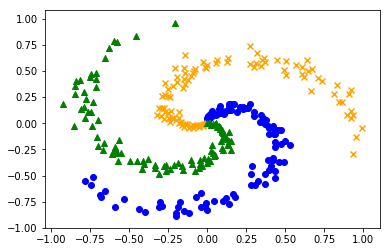

In [29]:
# プロットしてみる
import matplotlib.pyplot as plt

# spiral データセットを読み込む(x：2次元の入力データ, t: 3次元の教師データ[one-hotベクトル])
x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

# プロット領域の取得
plot_area = plt.figure().add_subplot(1,1,1)

# 散布図のプロット
for i, r in enumerate(t):
    # 種類によってマーカを変える
    if r.argmax(axis=0) == 0:
        mark = "o"
        color = "blue"
    elif r.argmax(axis=0) == 1:
        mark = "x"
        color = "orange"
    elif r.argmax(axis=0) == 2:
        mark = "^"
        color = "green"
    else:
        print("undefined label. ignored.")
        continue
    # プロット
    plot_area.scatter(x[i,0], x[i,1], marker=mark, color=color)





### ニューラルネットワークの実装

In [251]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    # 推論 x: 入力データ
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    #　順伝播 x: 入力データ, t: 正解データ
    def forward(self, x, t):
        # データを推論させて結果を出す
        score = self.predict(x)
        # 結果と正解とから損失を出す
        loss = self.loss_layer.forward(score, t)
        return loss

    # 逆電波 dout: 出力の勾配
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 学習用のソースコード

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01092471 0.0110537  0.01135353 0.01135285 0.01105335 0.0109249
 0.01135356 0.01105377 0.0110531  0.01105299 0.01105484 0.01135271
 0.01105509 0.01092489 0.01092492 0.01135355 0.01105534 0.01135286
 0.01092496 0.01105547 0.01105355 0.01135314 0.01092525 0.01135367
 0.01092476 0.01135351 0.01092493 0.01135335 0.01105526 0.01105466]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00849141 0.01114096 0.00848477 0.0084853  0.0084855  0.01114153
 0.01371031 0.0084912  0.01370585 0.01113518 0.0111277  0.00849184
 0.00848493 0.01371494 0.01371646 0.00848749 0.01371549 0.01113049
 0.01112758 0.0137105  0.01113732 0.00849125 0.01114394 0.00848526
 0.01114268 0.01371412 0.01371566 0.01112978 0.01371253 0.0137146 ]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00850182 0.01121912 0.01122068 0.01113304 0.01363869 0.0112271

 0.00557691 0.01594221 0.00561407 0.01624591 0.01174205 0.00560049]
| epoch 12 |  iter 10 / 10 | loss 4.88
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01158319 0.00935486 0.01234664 0.01234295 0.00930234 0.01270398
 0.00931755 0.01131992 0.01252202 0.01144238 0.01135732 0.01268835
 0.01141095 0.01153812 0.01268449 0.01244522 0.01133229 0.00921681
 0.01159139 0.01149002 0.0094294  0.01138603 0.00938657 0.01234336
 0.01242508 0.00943445 0.00937278 0.0126385  0.0093246  0.01272261]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01054452 0.01676232 0.01650093 0.01664477 0.00612412 0.00612231
 0.01050324 0.01071838 0.0061972  0.00616993 0.01680212 0.01047812
 0.00613075 0.0164209  0.01633794 0.00614703 0.01637461 0.00617544
 0.01061238 0.00619097 0.00617055 0.01667362 0.01655818 0.00620517
 0.01679871 0.00617668 0.00600483 0.00612029 0.01054164 0.01059544]
batch_size = 30
y[np.arange(batch_size), t].s

y[np.arange(batch_size), t] = [0.00211887 0.02852978 0.0021459  0.00211604 0.00227115 0.0022791
 0.00227821 0.00228181 0.00212082 0.00227776 0.0021181  0.00227995
 0.00211285 0.00211697 0.00226537 0.002263   0.00225889 0.02856436
 0.00215072 0.0022601  0.0022652  0.00225918 0.00225914 0.00214803
 0.02856898 0.0022815  0.00212157 0.02860081 0.02852795 0.00227063]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00577313 0.00360216 0.02392587 0.00359769 0.00361338 0.00362432
 0.00578499 0.02408354 0.00363776 0.02392907 0.00584958 0.00580729
 0.00358676 0.02377556 0.00583643 0.00581591 0.00585736 0.00358673
 0.00585123 0.0241116  0.02408716 0.00577068 0.00585487 0.00578653
 0.00576315 0.02410235 0.00584978 0.00359038 0.0035956  0.00361892]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02074697 0.00790423 0.00443243 0.00783361 0.00790669 0.00779536
 0.00441401 0.02106084 0.02108108 0.00773329 0.00789915 

y[np.arange(batch_size), t] = [9.20273264e-05 1.03113831e-03 9.20048967e-05 1.03006488e-03
 1.03414435e-03 1.02711169e-03 9.28690944e-05 3.21082477e-02
 3.21716004e-02 1.03322147e-03 3.22081327e-02 3.21125378e-02
 1.03240504e-03 9.20086354e-05 9.25325601e-05 3.22725146e-02
 9.28068099e-05 3.24631105e-02 3.22619867e-02 1.02782037e-03
 9.18590268e-05 3.25208107e-02 1.03001958e-03 9.24934369e-05
 3.21100219e-02 9.26518756e-05 3.25049112e-02 3.25104460e-02
 1.02832841e-03 3.22549637e-02]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [4.92683824e-04 3.31455001e-02 4.94827051e-04 4.91806978e-04
 4.49202807e-05 4.95153569e-04 4.91819811e-04 3.27576698e-02
 4.94972800e-04 4.91827375e-04 4.44716871e-05 3.28065386e-02
 4.44487363e-05 3.28176097e-02 4.92247144e-04 4.43989093e-05
 4.94876565e-04 4.45957535e-05 4.46442051e-05 4.92414841e-04
 3.27999559e-02 4.48936735e-05 4.44911821e-05 4.48779808e-05
 4.44519957e-05 4.45392778e-05 3.28356173e-02 4.48686819e

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02595879 0.02595974 0.02597346 0.00545577 0.00189867 0.00191274
 0.00190056 0.00546235 0.00544141 0.00541142 0.00191395 0.00190197
 0.00544118 0.00190368 0.02604257 0.0019137  0.0054575  0.02615199
 0.02616323 0.02596255 0.00191312 0.00544816 0.0261408  0.00189771
 0.00191434 0.00189881 0.02594701 0.00543871 0.02602833 0.00189845]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00501105 0.00316764 0.00317277 0.02534329 0.02511015 0.02512146
 0.00316523 0.00497826 0.0031803  0.00317592 0.003175   0.00317668
 0.00498642 0.00499174 0.00498412 0.00317043 0.00501641 0.00501554
 0.02536552 0.00316471 0.00316556 0.00317892 0.02514046 0.02508344
 0.00316725 0.00499557 0.00315619 0.00318092 0.00501102 0.00501802]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00702258 0.00701111 0.00707443 0.00701052 0.0070135  0.00702188
 0.01981489 0

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00155443 0.0015516  0.00154344 0.00154805 0.00154793 0.01800807
 0.01795746 0.00155334 0.0015497  0.00155103 0.01798379 0.01809912
 0.01807378 0.00155118 0.0137265  0.00154988 0.00155178 0.01798044
 0.01803199 0.0138046  0.01372547 0.00154912 0.00154935 0.01370244
 0.01381295 0.01371655 0.0137361  0.01377976 0.01371837 0.01381031]
| epoch 43 |  iter 10 / 10 | loss 5.01
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01839769 0.00715591 0.0071645  0.00716727 0.00766301 0.00772824
 0.00767079 0.01853082 0.00715542 0.00716951 0.00716233 0.01843628
 0.00716656 0.01852862 0.00770888 0.00716039 0.00712206 0.00766336
 0.00713924 0.00766917 0.01852808 0.00772485 0.0184018  0.01846379
 0.00765821 0.0184163  0.00713883 0.01844156 0.00713652 0.01842114]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0034977  0.01426525 0.00352688 0.00349

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00520312 0.00301726 0.00300807 0.00518564 0.00518009 0.00520988
 0.02514776 0.00520775 0.00519687 0.00519587 0.00520859 0.00518162
 0.00300876 0.003011   0.02507118 0.00520727 0.02512418 0.00519549
 0.0251472  0.00519254 0.02512069 0.02519249 0.02513526 0.0251828
 0.00302186 0.00519824 0.02513503 0.02512338 0.0030242  0.00301787]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01825362 0.00092794 0.00092783 0.01415463 0.01827843 0.0009282
 0.0183169  0.01824824 0.01826788 0.00093007 0.01415334 0.00092742
 0.00093253 0.01412634 0.00092823 0.01826415 0.00092853 0.00092751
 0.01828858 0.01414698 0.01822942 0.01413044 0.01831237 0.01415287
 0.00092789 0.01415393 0.01413611 0.01410575 0.01829641 0.01825382]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00099731 0.02333808 0.00099223 0.00903554 0.00099234 0.02328129

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00259986 0.00259886 0.01792872 0.01280678 0.01273858 0.01793475
 0.00259489 0.01274602 0.01792749 0.00259562 0.01276196 0.01279412
 0.00260263 0.00260138 0.01280503 0.00259475 0.01274257 0.01274137
 0.00259546 0.01274514 0.0025993  0.01274402 0.00260281 0.01797526
 0.01280731 0.01278514 0.01804479 0.01278386 0.01802629 0.01276505]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02967147 0.00155468 0.02961896 0.00155512 0.00155739 0.02959839
 0.00209399 0.00209358 0.00209377 0.00209223 0.00210325 0.02953355
 0.00155294 0.02960691 0.02957134 0.02956916 0.0015581  0.0020906
 0.02966124 0.00209234 0.00155544 0.00209274 0.00155323 0.02961639
 0.00209195 0.00210535 0.00155769 0.00155834 0.00155693 0.00155811]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00385831 0.00358867 0.02591494 0.00385209 0.00385424 0.0038559

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01199823 0.00665068 0.00662769 0.01197613 0.01199253 0.00662089
 0.01472312 0.01197845 0.0146998  0.0120081  0.01198771 0.01199442
 0.01472219 0.00662333 0.01471787 0.00661655 0.0146573  0.01471936
 0.0119997  0.00664142 0.00661609 0.01197687 0.01465856 0.00665033
 0.00664286 0.00662132 0.01470113 0.01197612 0.00662841 0.0120086 ]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00990488 0.00664632 0.01681283 0.01684629 0.01673725 0.00987447
 0.00667132 0.00666945 0.01682255 0.00987681 0.00663798 0.01684842
 0.00985046 0.00989895 0.00664663 0.00666932 0.00666902 0.01684218
 0.00667107 0.00984899 0.00665458 0.0168089  0.01684859 0.0168474
 0.00664182 0.00984805 0.01681212 0.00665612 0.00666554 0.0066723 ]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01308191 0.01311977 0.0027596  0.00277205 0.01311562 0.0027613

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00345885 0.0260012  0.00344629 0.02595062 0.00345924 0.00345112
 0.00344839 0.00345175 0.02591258 0.00395895 0.00345788 0.00396047
 0.00344494 0.00345876 0.02591173 0.00395324 0.02590282 0.0039553
 0.00395443 0.02591987 0.00345143 0.02603746 0.00344497 0.0259098
 0.02590401 0.02591736 0.00344981 0.02597608 0.02597056 0.00395253]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02793682 0.00477468 0.00060259 0.02794548 0.02804838 0.02795252
 0.00060186 0.02792119 0.00476158 0.0047588  0.0006011  0.00060098
 0.00475493 0.0279276  0.00060113 0.00476363 0.00060116 0.00476808
 0.02793707 0.00060138 0.02805839 0.00475912 0.0047739  0.00060228
 0.00477461 0.02804    0.00476631 0.00060178 0.02795959 0.02805774]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0003996  0.0043551  0.00039921 0.02857121 0.00039877 0.00039888

 0.00210851 0.00211297 0.02599632 0.00522946 0.02598798 0.00522435]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01975267 0.00995677 0.01974715 0.00995749 0.00363146 0.00996005
 0.00363091 0.01976614 0.00992957 0.01975678 0.0036468  0.00992585
 0.00995866 0.00363209 0.00992492 0.0197239  0.00993489 0.00992773
 0.00992461 0.00363071 0.00364294 0.00994025 0.00363696 0.00364478
 0.01978378 0.01977733 0.00363113 0.00364517 0.01978133 0.01976403]
| epoch 84 |  iter 10 / 10 | loss 5.11
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01563317 0.00426375 0.01340802 0.01340276 0.00424492 0.00426089
 0.01563021 0.01562686 0.00425784 0.00426233 0.01340597 0.01343222
 0.01567765 0.00424852 0.0042463  0.00424576 0.01561862 0.0134011
 0.01562677 0.01343065 0.01567664 0.01562345 0.0042634  0.01340721
 0.00426101 0.00425986 0.00426204 0.01563869 0.01564501 0.0042644 ]
batch_size = 30
y[np.arange(batch_size), t].sh

y[np.arange(batch_size), t] = [0.01514614 0.00738671 0.01081866 0.01514049 0.01515338 0.00737402
 0.01082021 0.01512619 0.01512501 0.00737346 0.01084356 0.01082099
 0.01515015 0.0108565  0.01514816 0.0151306  0.00736274 0.01081237
 0.00738585 0.00736975 0.01513156 0.00737733 0.00736194 0.00738469
 0.00738731 0.01512394 0.00736978 0.0108325  0.01082281 0.01514831]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0046676  0.00466926 0.00994282 0.00992674 0.00468463 0.01873271
 0.01871348 0.00467235 0.00468028 0.01870893 0.01871961 0.01871876
 0.00468096 0.00466652 0.01870125 0.01871418 0.01873885 0.00468418
 0.0187021  0.00994581 0.00466883 0.00992925 0.01872456 0.00468621
 0.00467344 0.00467243 0.00993896 0.00991168 0.01871445 0.00467569]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0018297  0.01191914 0.01188632 0.01961937 0.00183565 0.01963199
 0.01963284 0.0195817  0.01961409 0.01962957 0.00183548

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02036878 0.02036819 0.01143392 0.02036884 0.00152705 0.00152385
 0.01144389 0.00152717 0.00152546 0.01143472 0.01144081 0.02037733
 0.00152718 0.00152367 0.01143662 0.01143198 0.01144857 0.02037583
 0.0114449  0.02042624 0.00152291 0.01143196 0.00152362 0.01145251
 0.02038195 0.00152751 0.00152494 0.02039883 0.00152311 0.00152653]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0159844  0.0049524  0.01599915 0.01597905 0.01600269 0.01239095
 0.00495708 0.00494141 0.00494583 0.00494893 0.00494234 0.01598098
 0.00494724 0.01239681 0.01239689 0.01242729 0.01243231 0.01601038
 0.01241024 0.01239483 0.01243563 0.00494387 0.01239339 0.00494771
 0.01600822 0.01601198 0.01239195 0.00494326 0.01599104 0.01598515]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00541181 0.01545051 0.00539551 0.01247821 0.01246373 0.01248132
 0.01548471 0

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.03103658 0.00208045 0.00207772 0.00207805 0.00012544 0.00208046
 0.00207955 0.00012525 0.03108478 0.03106664 0.00207814 0.00208066
 0.00207912 0.00207957 0.00012556 0.00207912 0.0310769  0.00012513
 0.03111142 0.00207691 0.00012553 0.00207865 0.03105617 0.03104011
 0.0020795  0.03109914 0.00208074 0.00012511 0.0310903  0.00012552]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [1.21427966e-02 1.21469093e-02 1.21453842e-02 5.75891461e-05
 2.10736955e-02 5.73838134e-05 2.11362036e-02 1.21422471e-02
 1.21419406e-02 5.73977800e-05 5.74114884e-05 1.21513493e-02
 5.73885409e-05 2.10843702e-02 5.74904639e-05 2.10989578e-02
 5.73885106e-05 1.21617104e-02 2.10958645e-02 2.11378375e-02
 1.21267577e-02 1.21613077e-02 5.74223437e-05 5.75817949e-05
 1.21465761e-02 2.11355022e-02 1.21478729e-02 2.11334661e-02
 1.21526939e-02 1.21631188e-02]
batch_size = 30
y[np.arange(batch_size), t].s

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02354289 0.00282411 0.00282166 0.00282393 0.00697187 0.02350249
 0.00697152 0.00696897 0.00282342 0.00282356 0.00697011 0.02353857
 0.00282583 0.02347842 0.02349774 0.02354399 0.00697158 0.00697018
 0.00697277 0.00697744 0.00282608 0.00697506 0.02349052 0.00697368
 0.00282334 0.00699381 0.0028214  0.00282489 0.00699221 0.02348015]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01167759 0.01799481 0.00366518 0.01803647 0.01166034 0.0116456
 0.01798197 0.00366427 0.01803219 0.01800819 0.00365937 0.00366264
 0.00365943 0.01165244 0.00366446 0.00366467 0.0036642  0.01798497
 0.01164525 0.01167764 0.01798479 0.00366491 0.01166215 0.00366371
 0.0180058  0.01798369 0.01798629 0.01799308 0.017986   0.01799048]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00221814 0.00222194 0.00222028 0.0288135  0.00228566 0.00227945
 0.00221705 0.

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00403086 0.00403783 0.00404091 0.01205625 0.01723177 0.00403995
 0.01723551 0.01719224 0.01204371 0.01206365 0.01207644 0.00403509
 0.01207239 0.01206778 0.00404381 0.01720959 0.00403474 0.0040317
 0.01721033 0.0120633  0.01722535 0.01719783 0.00403332 0.01206863
 0.00404232 0.00404034 0.00404331 0.004037   0.01721342 0.01206552]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00947528 0.00946093 0.0088613  0.00948322 0.00884266 0.01499564
 0.00884293 0.00885586 0.00948602 0.00884834 0.01503232 0.01503261
 0.01499791 0.00948635 0.00947823 0.00948568 0.00884158 0.00884564
 0.00947156 0.00884209 0.01500252 0.00947268 0.01499702 0.00945778
 0.01503661 0.01499252 0.00947573 0.00947663 0.01499783 0.00947958]
| epoch 125 |  iter 10 / 10 | loss 4.85
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02234079 0.00767861 0.00335339 0.00766

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01151761 0.01151182 0.004194   0.0115129  0.01153216 0.01762159
 0.00418535 0.01762625 0.01152986 0.01150359 0.00418244 0.01761753
 0.01150596 0.01150491 0.01765636 0.01150536 0.004193   0.0115163
 0.01150781 0.01764577 0.00419474 0.01762837 0.01762929 0.01765906
 0.0115298  0.00419609 0.0115293  0.01762011 0.00419315 0.0115035 ]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00606509 0.00606544 0.00080215 0.02642727 0.00606114 0.00606059
 0.00605034 0.02647898 0.00080219 0.00080124 0.00080222 0.02641586
 0.02641532 0.02641697 0.00604856 0.00080148 0.00606392 0.00080173
 0.00080212 0.00605341 0.02641988 0.02647755 0.00605037 0.0008011
 0.0008011  0.02647779 0.00604929 0.00605783 0.02647282 0.00080197]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00116797 0.02012729 0.02013292 0.00116779 0.02016204 0.01203858

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00416005 0.00035621 0.00416356 0.00035628 0.00416592 0.00416485
 0.00415694 0.00035571 0.02883604 0.02881183 0.02883437 0.00035607
 0.00035535 0.00035537 0.02884052 0.02881521 0.0288296  0.00035538
 0.02883354 0.00035563 0.00035575 0.00415765 0.00416683 0.00035539
 0.00416663 0.00035543 0.0003562  0.00035542 0.00035548 0.00415803]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02065534 0.0206687  0.00454417 0.00815073 0.00813212 0.00814169
 0.02065487 0.02064332 0.00453727 0.02065684 0.02066968 0.00453625
 0.00454358 0.02066718 0.0045343  0.0081502  0.00814452 0.00454247
 0.00453284 0.00453356 0.02064685 0.00813286 0.0081411  0.00814484
 0.00814989 0.00453541 0.00453339 0.00454547 0.00454286 0.02066251]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01488355 0.01487515 0.01171613 0.01172025 0.00673835 0.011715

 0.01990152 0.00784911 0.00785122 0.0199009  0.01987957 0.00785841]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00499714 0.00499636 0.02306167 0.02308719 0.00527897 0.00499163
 0.00499393 0.00527821 0.00528618 0.02304636 0.00528175 0.00499378
 0.02308991 0.02303581 0.00498551 0.0049968  0.00499315 0.02309235
 0.00528871 0.02304198 0.00528037 0.00528672 0.02309181 0.00528892
 0.02307584 0.00499519 0.00528916 0.00499094 0.02304081 0.00499841]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00807685 0.0080704  0.00409368 0.02115739 0.00807677 0.00807015
 0.00409107 0.02120879 0.00806967 0.00807162 0.02117255 0.02116545
 0.00408694 0.00409401 0.00807412 0.00408761 0.02116407 0.00408681
 0.00807468 0.00806949 0.00806523 0.00409326 0.00807847 0.02119406
 0.00408799 0.00408637 0.02119976 0.00409351 0.02120781 0.00409091]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t

y[np.arange(batch_size), t] = [0.00958812 0.0001257  0.00012559 0.0001257  0.00012569 0.00958433
 0.0001256  0.00958257 0.00957827 0.00012549 0.0236189  0.023621
 0.00012547 0.02366457 0.00012569 0.00957976 0.00958688 0.009577
 0.00958911 0.02364779 0.02362189 0.00957809 0.00012554 0.00012569
 0.00012561 0.00012559 0.00957889 0.02362719 0.00012569 0.02362466]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00083327 0.01341303 0.0134143  0.01907149 0.01342797 0.01343612
 0.01907189 0.01909457 0.01341575 0.01344724 0.01343138 0.01343701
 0.01907151 0.01908628 0.00083252 0.01342666 0.01907569 0.00083431
 0.00083277 0.01343818 0.01343181 0.01909596 0.01907663 0.00083443
 0.00083285 0.0008344  0.01344496 0.00083332 0.0134133  0.01909459]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00778799 0.02527626 0.00028799 0.0077828  0.02525495 0.00028791
 0.00028785 0.00779185 0.00778865 0.0002878  0.00778904 0.0

y[np.arange(batch_size), t] = [0.00143314 0.02822329 0.02822059 0.00143168 0.00364319 0.00143308
 0.00363684 0.0282668  0.00363682 0.00363631 0.00363909 0.00363643
 0.00363758 0.00363963 0.00143395 0.00143369 0.00143357 0.02821155
 0.00363692 0.00143259 0.00363631 0.00143247 0.0036376  0.00143234
 0.00363669 0.00143364 0.00143367 0.00364274 0.02822585 0.00143323]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.006588   0.00584281 0.02093683 0.00658597 0.00584928 0.00658149
 0.00658824 0.00659227 0.00658971 0.00584811 0.020895   0.00584753
 0.00584326 0.00584986 0.0058447  0.02093932 0.02089091 0.00659214
 0.00658072 0.02089429 0.00658169 0.02089755 0.00658394 0.00658532
 0.00658075 0.02091515 0.00584541 0.00584852 0.00658375 0.00584342]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00621137 0.00620698 0.00621309 0.006272   0.00620952 0.00626124
 0.02083238 0.00626044 0.00625874 0.00625988 0.00626894

y[np.arange(batch_size), t] = [0.00917785 0.00918168 0.02032372 0.00378702 0.00379067 0.0037907
 0.0203589  0.02035602 0.00379103 0.00378741 0.0203603  0.02035531
 0.00918037 0.02035995 0.00919678 0.02035994 0.00378702 0.00379094
 0.00379074 0.00918673 0.00378734 0.00918064 0.02032928 0.00378756
 0.00378816 0.02035816 0.00919924 0.00919523 0.00917789 0.00378685]
| epoch 174 |  iter 10 / 10 | loss 4.85
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0078017  0.01026149 0.01528781 0.00780937 0.01528221 0.01527319
 0.01528634 0.00779566 0.00780971 0.01025107 0.01526176 0.00779478
 0.01025415 0.01025849 0.00779869 0.01526388 0.01024407 0.01528162
 0.00779439 0.00779591 0.00779452 0.01025611 0.01528618 0.00779422
 0.01026127 0.00779657 0.00779334 0.01023446 0.01025174 0.01026058]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01008396 0.00682132 0.00683314 0.01643212 0.0164259  0.01640041
 0.00683143 0.00

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00534096 0.01995405 0.00533368 0.00805078 0.00804922 0.00533565
 0.00805776 0.00805089 0.01994846 0.01992758 0.01991736 0.00534253
 0.0199479  0.00806305 0.00534287 0.00534226 0.00806294 0.0080537
 0.00533462 0.00805128 0.01994956 0.00805147 0.00533413 0.00533228
 0.00533967 0.00805019 0.00805025 0.00805115 0.00805711 0.00533635]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00372452 0.00731628 0.00731841 0.02231375 0.00372376 0.02228152
 0.02229111 0.0223302  0.00731045 0.02229147 0.00372279 0.00731795
 0.00731243 0.02230074 0.0037242  0.00372453 0.00372083 0.02231755
 0.00730589 0.00372068 0.00731629 0.00731782 0.0222889  0.00730832
 0.00731905 0.00372198 0.00731929 0.02227802 0.00731895 0.02228378]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00172257 0.00172323 0.01408692 0.01750067 0.01750008 0.01409316
 0.00172278 0.

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00272911 0.00273044 0.02976624 0.00272617 0.02976713 0.0298167
 0.00083636 0.02977031 0.02977545 0.02975657 0.00273122 0.02978438
 0.00083568 0.00083613 0.00083553 0.00083604 0.00273154 0.00083664
 0.0008362  0.00083659 0.0008353  0.02980322 0.00273008 0.00272951
 0.02976629 0.00272926 0.00272718 0.02976966 0.02976449 0.00083559]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00082047 0.00082181 0.00082135 0.0008208  0.03070497 0.00182049
 0.00181914 0.00182127 0.03070322 0.00182123 0.00182112 0.00082132
 0.03069808 0.00082026 0.00082077 0.00182098 0.00181949 0.00181989
 0.03068918 0.00082166 0.00181929 0.0306819  0.03071317 0.00181953
 0.00181945 0.00082039 0.00082177 0.00182111 0.00181938 0.00181996]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01895498 0.01237924 0.01240397 0.00199647 0.01896969 0.00199656
 0.01895135 0.

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [2.32711693e-02 2.32671640e-02 2.32697829e-02 5.46388567e-05
 2.32701687e-02 9.98958729e-03 5.46419440e-05 1.00062687e-02
 2.32786076e-02 5.45991166e-05 5.45833526e-05 2.32698245e-02
 2.32885445e-02 2.32865961e-02 5.46818525e-05 2.32670303e-02
 1.00058093e-02 9.99205698e-03 5.46697416e-05 5.46166556e-05
 2.32852778e-02 5.45880907e-05 5.45887984e-05 5.45829590e-05
 1.00005213e-02 2.32847304e-02 5.46859717e-05 2.32738913e-02
 2.32867845e-02 1.00060164e-02]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [4.67299364e-05 1.22322682e-03 4.66402690e-05 4.66389298e-05
 4.66462176e-05 1.22361251e-03 1.22352177e-03 4.67019437e-05
 3.20617249e-02 4.66670910e-05 1.22518455e-03 4.67370893e-05
 1.22389868e-03 3.20713365e-02 4.66422265e-05 1.22316209e-03
 4.66396780e-05 3.20586189e-02 4.66549480e-05 4.67054858e-05
 1.22395807e-03 1.22528165e-03 4.66562800e-05 3.20930119e-02

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02839176 0.0020231  0.00202117 0.00290659 0.02839553 0.0020229
 0.00202138 0.00291057 0.02839229 0.00290705 0.00202307 0.02842999
 0.00202126 0.02838822 0.00202165 0.00202251 0.00202178 0.00291026
 0.00202119 0.02841531 0.00202168 0.00202101 0.00202163 0.00291024
 0.00202205 0.00290685 0.00201848 0.02844172 0.00202126 0.0020194 ]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00064995 0.0257896  0.00692112 0.02576624 0.00692343 0.00065084
 0.00064975 0.02578281 0.02578817 0.00692478 0.00692552 0.00065045
 0.02577373 0.00064991 0.00064982 0.00692144 0.00693278 0.00065088
 0.02576561 0.00064993 0.00692072 0.00065034 0.00065043 0.02578788
 0.02577674 0.00064985 0.00064991 0.02577203 0.0069215  0.00065087]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00556828 0.02429034 0.0035005  0.00349829 0.00556935 0.0055591

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01624746 0.01046447 0.01047369 0.01624606 0.00662065 0.01626038
 0.00661046 0.00661283 0.00661305 0.01046631 0.01624826 0.00660884
 0.01625518 0.01047624 0.01047016 0.00661012 0.01626102 0.01625629
 0.01624957 0.00662191 0.01046338 0.00660973 0.01624828 0.01625861
 0.00661057 0.01047605 0.01046799 0.01046259 0.01046709 0.01047706]
| epoch 215 |  iter 10 / 10 | loss 5.34
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01431901 0.00453405 0.01433919 0.01433015 0.01432088 0.01434089
 0.01446245 0.01446306 0.01432092 0.01432702 0.01446458 0.01447715
 0.01446608 0.01434005 0.00453466 0.01445806 0.00453689 0.01432984
 0.00453368 0.00453788 0.01447148 0.01434016 0.01447517 0.00453819
 0.01432916 0.01447302 0.01432056 0.01446434 0.00453701 0.00453477]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01031151 0.001731   0

y[np.arange(batch_size), t] = [0.0172222  0.0097459  0.00974765 0.00634931 0.00975736 0.00974575
 0.01722385 0.01725008 0.00975448 0.01723885 0.00975612 0.00974282
 0.00634528 0.00634576 0.01725071 0.00634828 0.01723576 0.00634617
 0.00634792 0.00975721 0.00974777 0.017244   0.00635034 0.01722787
 0.01722385 0.00634731 0.0063478  0.01724815 0.00974819 0.00634976]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01641175 0.01009435 0.00681726 0.016428   0.01008477 0.01008369
 0.01643944 0.00682117 0.00682065 0.01008477 0.00681877 0.00682114
 0.00681728 0.01643629 0.00681936 0.00681544 0.0068174  0.00681569
 0.01644244 0.0100942  0.00681526 0.0068215  0.01009466 0.01009008
 0.00681935 0.01008137 0.00681544 0.00681709 0.0100892  0.00681465]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02904902 0.00318072 0.00111454 0.0011156  0.02900778 0.02904994
 0.00111473 0.02903113 0.00111613 0.00111434 0.02905125

y[np.arange(batch_size), t] = [0.00463648 0.00399148 0.00463543 0.02469543 0.02471358 0.00464175
 0.02471145 0.00463521 0.00399079 0.00398801 0.00398916 0.00463566
 0.00464286 0.02469076 0.02467849 0.00463561 0.00463575 0.0039884
 0.00463922 0.00463577 0.00398845 0.0246804  0.00464242 0.00463682
 0.00463763 0.00463638 0.00398322 0.02471218 0.00463513 0.02468559]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00111817 0.00795977 0.00794947 0.00795995 0.02426278 0.00111771
 0.02424734 0.00795207 0.02425734 0.00795638 0.02424731 0.00795983
 0.0011191  0.00794853 0.02427402 0.02427964 0.02427619 0.00111815
 0.0242444  0.02425362 0.00795766 0.02427766 0.02428669 0.00795433
 0.00111899 0.02424475 0.00795448 0.00111807 0.02428225 0.00795951]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00012765 0.00526234 0.02792939 0.00526587 0.02792986 0.00526848
 0.00012758 0.02792911 0.00526903 0.02793781 0.0279509  

y[np.arange(batch_size), t] = [0.00068967 0.027562   0.00068924 0.02753665 0.00507321 0.02757049
 0.02753649 0.00506898 0.00068954 0.0275728  0.00507636 0.00068888
 0.00068923 0.00507737 0.00068953 0.02757323 0.00068938 0.02757147
 0.00068973 0.0006896  0.00068953 0.00068922 0.00068924 0.02755616
 0.00068926 0.00068936 0.02757166 0.02756966 0.00507703 0.02755335]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00298712 0.00298645 0.0029871  0.0295326  0.0295289  0.02956062
 0.00298681 0.00077156 0.00298571 0.00298597 0.00298515 0.00298708
 0.0295648  0.00077203 0.00077284 0.0007722  0.00077192 0.02953919
 0.00298485 0.0007724  0.02957298 0.00077255 0.02957027 0.00077252
 0.00298551 0.0295563  0.00298601 0.00077259 0.00298506 0.00298738]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.0175512  0.01485836 0.01485982 0.0175547  0.01486998 0.00090938
 0.01484698 0.00090922 0.00090832 0.00090922 0.01756571

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00558542 0.02593171 0.02590881 0.00181325 0.00181372 0.00181563
 0.00181365 0.00558452 0.00558197 0.00181452 0.00558615 0.00181363
 0.02591722 0.0018153  0.02594009 0.0259136  0.00558157 0.0018137
 0.02594263 0.00181315 0.02591974 0.00558009 0.00558583 0.00181441
 0.02594003 0.02592841 0.00558195 0.02591762 0.02593173 0.00181337]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00257333 0.00252951 0.02823397 0.02823301 0.00257286 0.00257283
 0.02821469 0.00253005 0.00257332 0.00252963 0.00253026 0.02823156
 0.002575   0.00257337 0.00257299 0.02820658 0.00257707 0.02819211
 0.00253022 0.00257316 0.00257371 0.00252964 0.00257688 0.0282253
 0.0025317  0.00252975 0.00253091 0.02823366 0.00252669 0.00253092]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00703594 0.00703732 0.00692043 0.01937833 0.00692086 0.01936199
 0.01937783 0.0

y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02256467 0.00502578 0.00502637 0.00503324 0.02257746 0.00503112
 0.00503194 0.00503234 0.00503189 0.00503242 0.00573549 0.02256926
 0.022568   0.02257903 0.00502691 0.02256666 0.02257313 0.02255207
 0.02256677 0.00502531 0.02256385 0.0050261  0.0057318  0.00503299
 0.02257786 0.00573154 0.00502596 0.00502572 0.00573215 0.00573038]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00061239 0.01466078 0.00061201 0.00061168 0.01807591 0.00061186
 0.00061218 0.00061177 0.01806492 0.00061239 0.01465755 0.00061202
 0.00061235 0.01807208 0.01807406 0.00061206 0.00061211 0.0180561
 0.01467857 0.00061241 0.0180784  0.01465818 0.01465918 0.00061224
 0.00061224 0.00061164 0.01806893 0.01465851 0.00061185 0.00061169]
| epoch 256 |  iter 10 / 10 | loss 5.03
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01678423 0.01676784 0.01044937 0.01044

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01487681 0.01657667 0.01659464 0.00185702 0.01487412 0.0165981
 0.01487437 0.00185685 0.0018567  0.00185933 0.01487947 0.01487421
 0.01488849 0.01660496 0.01659878 0.01659475 0.01487104 0.01488609
 0.01659866 0.00185687 0.00185712 0.01658946 0.01660552 0.01487244
 0.01487247 0.00185696 0.01488397 0.00185684 0.01660139 0.00185895]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00126091 0.01822886 0.01383453 0.00126095 0.01383046 0.0138379
 0.0012626  0.00126173 0.00126249 0.0138353  0.00126262 0.01824121
 0.0182428  0.0138282  0.01383428 0.01823136 0.01824243 0.01822143
 0.01382818 0.01382198 0.00126217 0.00126192 0.01822372 0.01824029
 0.01822751 0.01383728 0.01381827 0.00126126 0.01383857 0.01383062]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02293886 0.02294308 0.0229449  0.00079991 0.00959516 0.00079949

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02556161 0.00273672 0.0027398  0.02557343 0.00500569 0.00273675
 0.02557646 0.00273842 0.02557329 0.00500874 0.00273682 0.0050119
 0.00501093 0.00501166 0.02559186 0.02557755 0.00501132 0.02559275
 0.00274011 0.0255621  0.00501183 0.02557191 0.00500842 0.00273732
 0.00500842 0.00273677 0.00500916 0.00273692 0.00273704 0.00500837]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00996735 0.0038697  0.01948122 0.01949416 0.01948718 0.00996502
 0.01949337 0.00387461 0.01950174 0.01949883 0.01950156 0.00386943
 0.00387154 0.01949196 0.00996952 0.01950284 0.00996439 0.00997181
 0.00996608 0.019481   0.01950318 0.00996767 0.019504   0.01948667
 0.01948397 0.01948031 0.01950269 0.00387469 0.00387039 0.00386964]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.03237359 0.03237509 0.00067806 0.00028163 0.0323574  0.0006779

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [2.30062363e-02 1.96625822e-05 2.30066806e-02 1.96426959e-05
 1.96621940e-05 2.29747719e-02 1.96434121e-05 2.30071391e-02
 2.29990349e-02 1.96606177e-05 1.96404734e-05 1.03281941e-02
 2.29915151e-02 1.96498893e-05 1.96415001e-05 1.96414665e-05
 1.96604948e-05 2.29998133e-02 1.03305658e-02 1.96628480e-05
 2.30066192e-02 1.03183816e-02 1.96625806e-05 1.03175482e-02
 1.03214151e-02 1.96442441e-05 1.03177259e-02 2.30077138e-02
 1.03181089e-02 1.96506606e-05]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00658514 0.00658204 0.02657019 0.0265866  0.00018276 0.00018291
 0.00658113 0.00018288 0.00018286 0.02657072 0.00658291 0.00018293
 0.00018274 0.00018292 0.00658284 0.00018288 0.02658653 0.00018277
 0.00018282 0.00018271 0.02657682 0.02656876 0.02657757 0.02658488
 0.02657178 0.00658848 0.00018272 0.02657994 0.0265573  0.02658507]
batch_size = 30
y[np.arange(b

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.02350768 0.00245879 0.00245865 0.02351123 0.00735424 0.02350021
 0.0024584  0.02352407 0.00245592 0.00735256 0.00245556 0.02350362
 0.00735488 0.00245768 0.00735741 0.00245725 0.00245711 0.02350701
 0.0234998  0.0073567  0.00735746 0.00245823 0.00245605 0.02350065
 0.00735376 0.02351086 0.02351665 0.00735418 0.02352461 0.00245569]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00349373 0.00330009 0.00349723 0.00349309 0.02651232 0.00329981
 0.02652659 0.02654147 0.00329912 0.00349748 0.00330142 0.00329949
 0.00330016 0.00330131 0.0265181  0.02654054 0.00349309 0.02651844
 0.00329767 0.00329876 0.0265146  0.00349349 0.00349382 0.00330116
 0.00329578 0.00329969 0.00330083 0.00349723 0.00349305 0.00349324]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01632809 0.01632396 0.00574156 0.00574218 0.00573935 0.005740

 0.00163804 0.00163894 0.00163881 0.00163812 0.01092224 0.00163704]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01071216 0.00301994 0.00301981 0.00301963 0.01961795 0.01959254
 0.01961092 0.00301774 0.01071353 0.00301926 0.00301977 0.00301786
 0.00301718 0.01961811 0.01071275 0.01961663 0.00301997 0.01071378
 0.0196162  0.0107195  0.01959192 0.01071713 0.00301688 0.01959489
 0.00302007 0.01071465 0.01071342 0.01960228 0.01071804 0.01959318]
batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.00527788 0.00826986 0.00527598 0.00827079 0.01979543 0.01979036
 0.00826596 0.01979136 0.0198056  0.00827123 0.00528028 0.00528021
 0.01980298 0.00826179 0.00527833 0.00527683 0.00527615 0.01978166
 0.00527768 0.00528021 0.00826975 0.01978468 0.01978309 0.00527555
 0.00827018 0.00826605 0.00826579 0.01979652 0.00826657 0.00527443]
| epoch 297 |  iter 10 / 10 | loss 4.88
batch_size = 30
y[np.arange(batch_size), t].

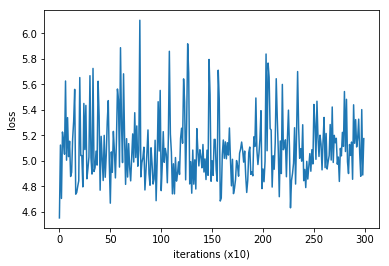

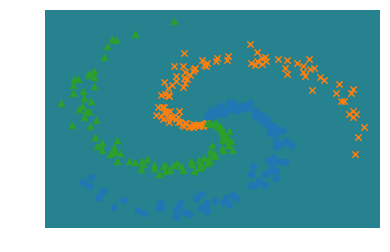

In [263]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()



### Trainer クラス

In [260]:
import time

class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # シャッフル
            idx = np.random.permutation(np.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 勾配を求め、パラメータを更新
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 共有された重みを1つに集約
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 評価
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

In [261]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

batch_size = 30
y[np.arange(batch_size), t].shape = (30,)
y[np.arange(batch_size), t] = [0.01092471 0.0110537  0.01135353 0.01135285 0.01105335 0.0109249
 0.01135356 0.01105377 0.0110531  0.01105299 0.01105484 0.01135271
 0.01105509 0.01092489 0.01092492 0.01135355 0.01105534 0.01135286
 0.01092496 0.01105547 0.01105355 0.01135314 0.01092525 0.01135367
 0.01092476 0.01135351 0.01092493 0.01135335 0.01105526 0.01105466]


NameError: name 'remove_duplicate' is not defined

## 計算の高速化

### ビット精度

* NumPyの浮動小数点数のデータ型は既定で64ビット
* ニューラルネットワークの推論および学習はビット数を落としても認識精度をそれほど落とさずに実行できることが知られている
    * ニューラルネットワークの学習および推論は32ビットでも認識精度はほとんど劣化しない
        * 推論に限定すれば16ビットでも精度を劣化させずに処理できる
        * データを16ビットにしてもGPUでは32ビットで計算されることもあり，速度が有利とは限らない．しかし保存サイズの点に関しては必ず有利となる
* 少ないビット数での処理はメモリ容量，データ転送のバス帯域，計算速度の点で有利なため可能なら利用すると良い

In [34]:
# 浮動小数点数のデータサイズの確認
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [35]:
# 32ビットの浮動小数点数を使う方法
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [37]:
# 16ビットの浮動小数点数も扱えるか？--> 扱える
c = np.random.randn(3).astype(np.float16)
c.dtype

dtype('float16')

### GPU(CuPy)

* ディープラーニングで行われる大量の積和計算は並列実行が可能でGPUは並列な計算の実行を得意とする
* 既存のディープラーニングのフレームワークはGPUとCPUの両方で利用できるように作られている
* GPUを用いた計算ライブラリの一つとしてCuPyがある
* CuPyの利用にはNVIDIA製GPUおよびCUDAが必要である
* CuPyはNumPyと（ほぼ）同じAPIをもつため，numpyの代わりにcupyをimportすることでGPU対応に変更できる

## まとめ

* ニューラルネットワークの基本の復習
    * 数学の複数：ベクトル，行列など
    * Python，NumPy の基本的な使い方
* ニューラルネットワークの仕組み
    * 計算グラフの基本パーツ：加算ノード，乗算ノードなど
    * 順伝播と逆伝播
* ニューラルネットワークの実装
    * ニューラルネットワークの基本パーツ：レイヤ
    * レイヤの実装：メソッド(forward, backward), インスタンス変数(params, grads)
* 渦巻きデータセットに対する学習および学習の確認